# 데이터셋 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-> 데이터 변수 설명

Passengerid: passenger id

survival:	Survival	0 = No, 1 = Yes

pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
name: name

sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


TARGET DATA: SURVIVAL


In [ ]:
PATH = "/content/drive/MyDrive/KUBIG/ML 4주차 과제"

train_df = pd.read_csv(PATH+"/train.csv")
test_df = pd.read_csv(PATH+"/test.csv")

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# train.csv 데이터 개수: 891 x 12
print("Train set's shape: ", train_df.shape)
print("Test set's shape: ", test_df.shape)

Train set's shape:  (891, 12)
Test set's shape:  (418, 11)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 승선 장소 

train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
test_df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 시각화

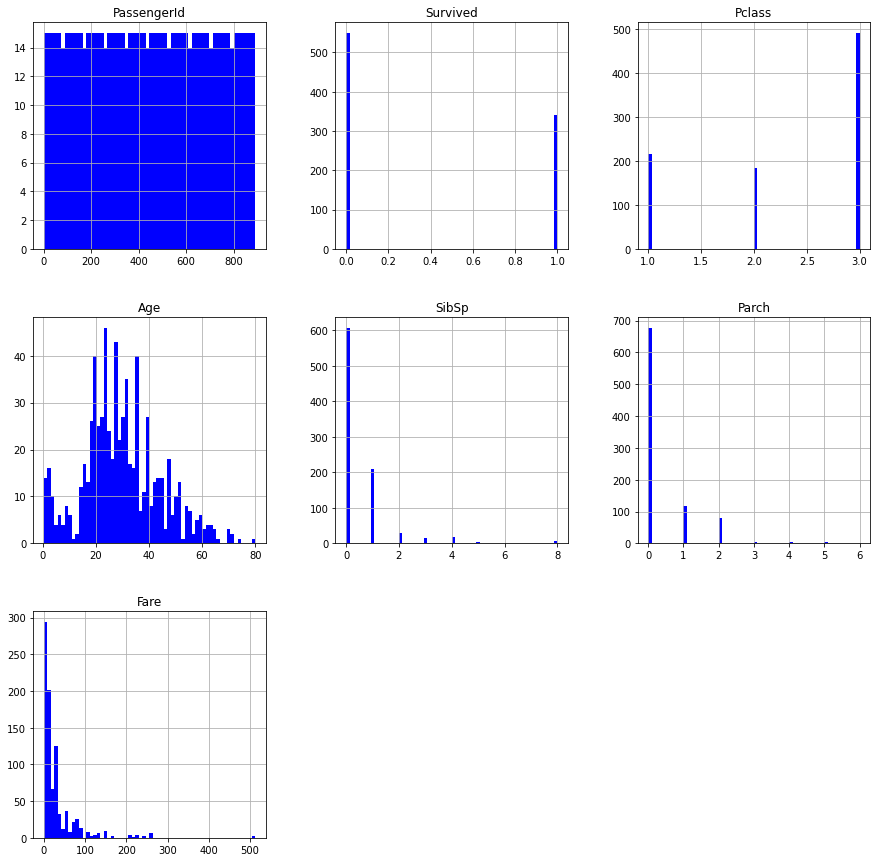

In [ ]:
train_df.hist(bins = 60, figsize = (15,15), color = "blue")
plt.show()

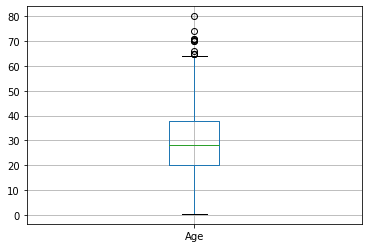

In [ ]:
train_df.boxplot(column = "Age")

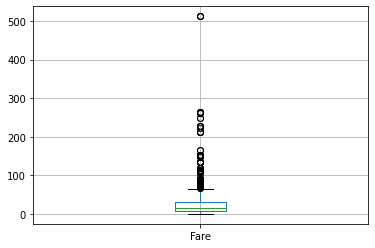

In [ ]:
train_df.boxplot(column = "Fare")

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

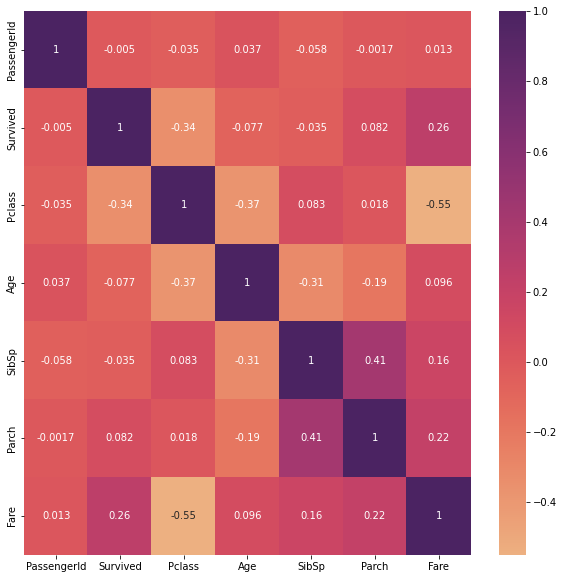

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot = True, cmap = "flare")
plt.show()

In [ ]:
train_df["Age"].fillna(train_df["Age"].median(), inplace = True)
test_df["Age"].fillna(train_df["Age"].median(), inplace = True)

In [ ]:
train_df["Age"].median()

28.0

In [ ]:
train_df["Embarked"].fillna("S", inplace = True)
test_df["Embarked"].fillna("S", inplace = True)

In [ ]:
test_df["Fare"].fillna(train_df["Fare"].median(), inplace = True)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [25]:
test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
train_df['Fam']=np.where((train_df["SibSp"]+train_df["Parch"])>0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [ ]:
test_df['Fam']=np.where((test_df["SibSp"]+test_df["Parch"])>0, 0, 1)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,0
8,1,3,female,27.0,11.1333,S,0
9,1,2,female,14.0,30.0708,C,0


In [ ]:
X_cat = train_df[["Sex", "Embarked", "Pclass", "Fam"]]
X_cat = pd.get_dummies(X_cat)

X_cat

,Pclass,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,1,0,0,1
1,1,0,1,0,1,0,0
2,3,1,1,0,0,0,1
3,1,0,1,0,0,0,1
4,3,1,0,1,0,0,1
...,...,...,...,...,...,...,...
886,2,1,0,1,0,0,1
887,1,1,1,0,0,0,1
888,3,0,1,0,0,0,1
889,1,1,0,1,1,0,0


In [22]:
X_cat_test = test_df[["Sex", "Embarked", "Pclass", "Fam"]]
X_cat_test = pd.get_dummies(X_cat_test)

X_cat_test

,Pclass,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,1,0,1,0
1,3,0,1,0,0,0,1
2,2,1,0,1,0,1,0
3,3,1,0,1,0,0,1
4,3,0,1,0,0,0,1
...,...,...,...,...,...,...,...
413,3,1,0,1,0,0,1
414,1,1,1,0,1,0,0
415,3,1,0,1,0,0,1
416,3,1,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_num = train_df.drop(["Sex", "Embarked", "Pclass", "Fam", "Survived"], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [27]:
scaler = StandardScaler()
X_num_test = test_df.drop(["Sex", "Embarked", "Pclass", "Fam"], axis=1)

scaler.fit(X_num)
X_scaled_test = scaler.transform(X_num_test)
X_scaled_test = pd.DataFrame(X_scaled_test, index=X_num_test.index, columns=X_num_test.columns)

In [28]:
x_train = pd.concat([X_scaled, X_cat], axis=1)
y_train = train_df["Survived"]

In [33]:
x_test = pd.concat([X_scaled_test, X_cat_test], axis = 1)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logregression = LogisticRegression()
LogReg = logregression.fit(x_train, y_train)

In [37]:
y_pred_test = LogReg.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
type(y_pred_test)
y_pred_test = pd.DataFrame(y_pred_test)

In [53]:
final = pd.concat([x_test, y_pred_test], axis = 1)
final.rename({0: 'Survived'}, axis=1, inplace=True)

In [54]:
final

,Age,Fare,Pclass,Fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.394887,-0.490783,3,1,0,1,0,1,0,0
1,1.355510,-0.507479,3,0,1,0,0,0,1,0
2,2.508257,-0.453367,2,1,0,1,0,1,0,0
3,-0.181487,-0.474005,3,1,0,1,0,0,1,0
4,-0.565736,-0.401017,3,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,-0.104637,-0.486337,3,1,0,1,0,0,1,0
414,0.740711,1.544246,1,1,1,0,1,0,0,1
415,0.702286,-0.502445,3,1,0,1,0,0,1,0
416,-0.104637,-0.486337,3,1,0,1,0,0,1,0
